## Введение

**ЗАДАЧА**

Прокатчик электросамокатов передал данные о некоторых пользователях из нескольких городов, а также об их поездках. Пользователи данными самокатами имеют возможность использовать для аренды мобильное приложение. Также, у них есть выбор: ездить на электросамокатах без подписки, либо подписаться на тариф Ultra.

Условия без подписки:
* абонентская плата отсутствует;
* стоимость одной минуты поездки — 8 рублей;
* стоимость старта (начала поездки) — 50 рублей;

Условия с подпиской Ultra:
* абонентская плата — 199 рублей в месяц;
* стоимость одной минуты поездки — 6 рублей;
* стоимость старта — бесплатно.

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Необходимо проанализировать данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.

**ПЛАН РАБОТЫ**

1. Компания предоставила информацию в трёх файлах: 
* users_go.csv - пользователи;
* rides_go.csv - поездки;
* subscriptions_go.csv - подписки. 

Проработаем полученные данные, проверим, типы данных, наличие пропущенных значений и дубликаты.


2. Опишем и визуализируем общую информацию о пользователях и поездках:
* частоту встречаемости городов;
* соотношение пользователей с подпиской и без;
* Возраст пользователей;
* расстояние за одну поездку;
* Продолжительность поездок;
* Зависимость времени поездок от их расстояния.

3. Объединим данные, а затем разобьем их на две группы: пользователи с подпиской и без подписки. Визуализируем информацию о времени и поездках по каждой группе.

4. Подсчитаем выручку. Для этого найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. А затем по формулам посчитаем помесячную выручку по каждому пользователю.


5. Проверим 3 гипотезы и выясним:
* Тратят ли пользователи с подпиской больше времени на поездки?
* Действительно ли расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров (оптимальное расстояние с точки зрения износа самоката)?
* Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки или нет?

6. Сформулируем общий вывод и рекомендации.

## Загрузка данных

### Импорт библиотек и считывание файлов

Импортируем библиотеки и считаем CSV-файлы с данными с помощью библиотеки Pandas и сохраним их в датафреймы.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import sqrt

In [2]:
users = pd.read_csv('/datasets/users_go.csv') #информация о пользователях
trip = pd.read_csv('/datasets/rides_go.csv') #информация о поездках
subscript = pd.read_csv('/datasets/subscriptions_go.csv') #информация о подписках

### Изучение информации

Выведем первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

In [3]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


Датафрейм **users** содержит следующую информацию: 
* уникальный идентификатор пользователя; 
* имя пользователя; 
* возраст; 
* город; 
* тип подписки.

In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
trip.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


Датафрейм **trip** содержит следующую информацию: 
* уникальный идентификатор пользователя; 
* расстояние, которое пользователь проехал в текущей сессии (в метрах); 
* продолжительность сессии(в мин). время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»; 
* дата совершения поездки.

In [6]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
subscript.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Датафрейм **subscript** содержит следующую информацию: 
* тип подписки; 
* стоимость одной минуты поездки по данной подписке; 
* стоимость начала поездки; 
* стоимость ежемесячного платежа.

### Вывод

Мы загрузили данные и изучили их. 

Датафрейм **users** содержит: 
* уникальный идентификатор пользователя; 
* имя пользователя; 
* возраст; 
* город; 
* тип подписки.

Датафрейм **trip** содержит: 
* уникальный идентификатор пользователя; 
* расстояние, которое пользователь проехал в текущей сессии (в метрах); 
* продолжительность сессии (в мин). время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»; 
* дата совершения поездки.

Датафрейм **subscript** содержит: 
* тип подписки; 
* стоимость одной минуты поездки по данной подписке; 
* стоимость начала поездки; 
* стоимость ежемесячного платежа.

При изучении данных было замечено, что:

* Столбец **date** датафрейма **trip** имеет тип данных object. Нужно перевести его к типу данных datetime.
* Для дальнейшей работы необходимо дополнить таблицу столбцом с номером месяца.

Также для дальнейшего анализа нужно проверить данные на дубликаты и аномальные значения.



## Предобработка данных

### Типы данных

Приведём столбец date к типу даты Pandas.

In [9]:
trip['date'] = pd.to_datetime(trip['date'], format='%Y-%m-%dT%H:%M:%S')
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


###  Дополнение датафрейма столбцами

Проверим, за какой период предоставлены данные.

In [10]:
trip['date'].dt.year.sort_values().unique()

array([2021])

Данные предоставленые на один год - 2021.

Создадим новый столбец с номером месяца на основе столбца date.

In [11]:
trip['month'] = trip['date'].dt.month
trip.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [12]:
trip['month'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [13]:
users['age'].sort_values().unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 43])

### Работа с пропущенными значениями и  дубликатами

Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.

Проверка пропущенных значений в датафрейме **users**:

In [14]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Пропущенных значений нет.

Проверка пропущенных значений в датафрейме **trip**:

In [15]:
trip.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Пропущенных значений нет.

Проверка пропущенных значений в датафрейме **subscript**:

In [16]:
subscript.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропущенных значений нет.

Проверим данные каждого датафрейма на **дубликаты**.

Проверим датафрейм **users** на **неявные дубликаты**.

In [17]:
users['city'].sort_values().unique()

array(['Екатеринбург', 'Краснодар', 'Москва', 'Омск', 'Пятигорск',
       'Ростов-на-Дону', 'Сочи', 'Тюмень'], dtype=object)

In [18]:
users['subscription_type'].sort_values().unique()

array(['free', 'ultra'], dtype=object)

In [19]:
users['age'].sort_values().unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 43])

Неявные дубликаты и аномалии в датафрейме users не выявлены.

Проверим датафрейм **trip** на **аномальные значения**.

In [20]:
trip['distance'].sort_values().unique()

array([8.55682926e-01, 2.57078689e+00, 4.32950578e+00, ...,
       6.90849134e+03, 7.06600377e+03, 7.21100774e+03])

In [21]:
trip['duration'].sort_values().unique()

array([ 0.5       ,  2.03563247,  2.05325125, ..., 39.52660212,
       39.87385602, 40.82396262])

Проверку на **явные дубликаты** по сумме ключевых параметров проведём после объединения данных.

###  Вывод

Перед анализом провели предобработку данных:
* Столбец **date** датафрейма **trip** привели к типу данных datetime;
* Добавили в датафрейм новый столбец с номером месяца на основе столбца date;
* Проверили данные на наличие пропущенных значений и дубликатов. Пропущенные значения и неявные дубликаты не выявлены.
* Решили, что проверку на явные дубликаты целесообразнее провести после объединение данных.

## Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках. Для удобства создадим функции для визуализации анализа на графиках, которые нам могут понадобиться на данном и следующих шагах.

In [22]:
def grafik_bar(graf):
    for r in graf:
        splot=graf.plot(
        figsize=(15,8), 
        kind='bar',
        grid=True,
        color = '#35c0cd')
        for i in splot.patches:
            splot.annotate(format(i.get_height(), '.1f'), 
                   (i.get_x() + i.get_width() / 2., i.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [23]:
def grafik_bar_gorizont(graf):
    for r in graf:
        splot=graf.plot(
        figsize=(15,8), 
        kind='barh',
        grid=True,
        color = '#35c0cd')
    for i in splot.patches:
        width = i.get_width()    
        splot.text(width + 1, i.get_y() + i.get_height() / 2, '{:1.2f}'.format(width), 
                ha = 'left', va = 'center')

In [24]:
def one_hist(data, column, title):
    data[column].plot(kind='hist',
                      label = A,
                      bins=Bin,
                      color='#35c0cd',
                      grid=True,
                      figsize = (15,8),
                      legend=True,
                      alpha=.50,
                      edgecolor='white')
def second_hist(data, column, title):
    data[column].plot(kind='hist',
                      label = B,
                      bins=Bin,
                      color='#265c61',
                      grid=True,
                      figsize = (15,8),
                      legend=True,
                      alpha=.50,
                      edgecolor='white')

### Частота встречаемости городов

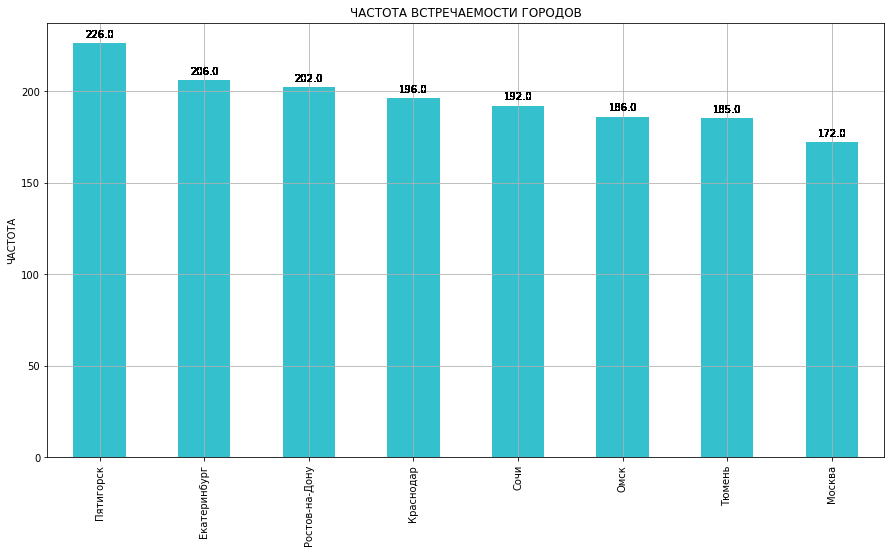

In [25]:
grafik_bar(users['city'].value_counts())
plt.title('ЧАСТОТА ВСТРЕЧАЕМОСТИ ГОРОДОВ')
plt.ylabel('ЧАСТОТА')
plt.xlabel('');

Данные собраны из восьми городов. 
Чаще всего встречается Пятигорск, реже всего - Москва.

### Соотношение пользователей с подпиской и без подписки

In [26]:
col_ultra = (users[users['subscription_type'] == 'ultra']['subscription_type'].count())
perc_ultra = col_ultra * 100 / len(users['subscription_type'])
print('Количество пользователей тарифом ultra:', col_ultra)
print('Процент пользователей тарифом ultra:', perc_ultra.round())

Количество пользователей тарифом ultra: 719
Процент пользователей тарифом ultra: 46.0


In [27]:
col_free = (users[users['subscription_type'] == 'free']['subscription_type'].count())
perc_free = col_free * 100 / len(users['subscription_type'])
print('Количество пользователей без подписки:', col_free)
print('Процент пользователей без подписки:', perc_free.round())

Количество пользователей без подписки: 846
Процент пользователей без подписки: 54.0


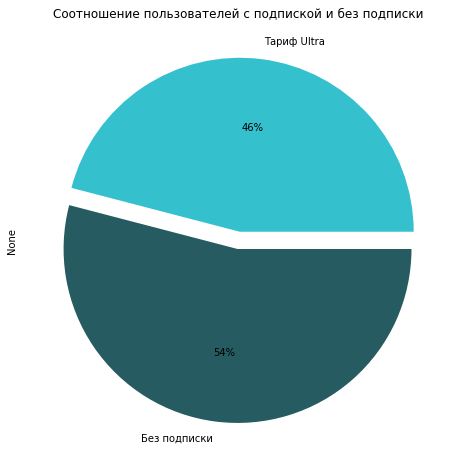

In [28]:
dolya_tarif = [perc_ultra, perc_free]
dolya_tarif = pd.Series([perc_ultra, perc_free])
colors = ('#35c0cd','#265c61')
labels = ['Тариф Ultra', 'Без подписки']
explode = (0.05, 0.05)
dolya_tarif.plot.pie(
        explode=explode,
    labels = labels,
    colors = colors, 
    autopct='%1.0f%%', 
    figsize = (8,8),
    title='Соотношение пользователей с подпиской и без подписки');

Как мы видим, чуть больше половины пользователей используют самокаты без подписки. Скорее всего, иметь подписку на тариф выгодно людям, которые пользуются им на постоянной основе. Судя по предоставленным данным, выгода от подписки начинается, если пользователь уверен, что он будет проезжать более 75 мин в месяц ежемесячно.

### Возраст пользователей

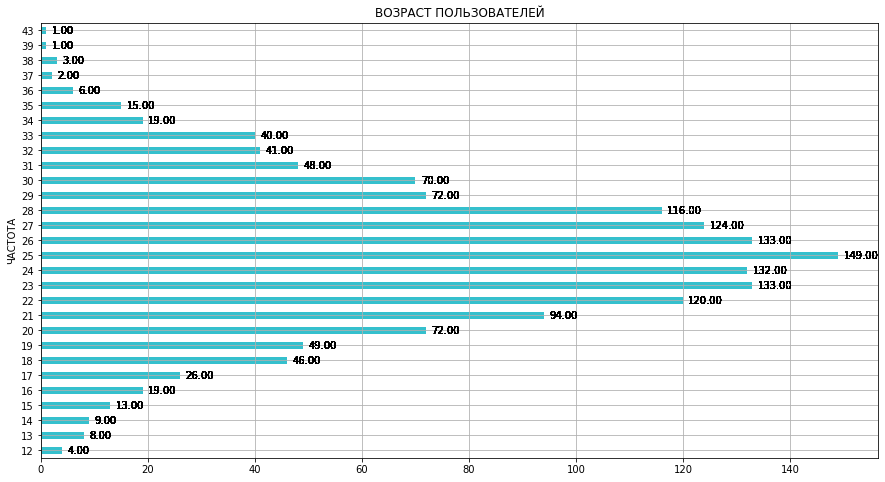

In [29]:
grafik_bar_gorizont(users['age'].value_counts(sort=False))
plt.title('ВОЗРАСТ ПОЛЬЗОВАТЕЛЕЙ')
plt.ylabel('ЧАСТОТА')
plt.xlabel('');

Как видно из графика чаще всего самокатами пользуются люди возрастом от 22 до 28 лет. Реже всего дети от 12 до 17 лет и взрослые от 36 до 43 лет.

Чаще всего прокатчики выставляют лицам до 18 лет ограничения на аренду самокатов. На сколько это работает на практике не известно. Но также, детям реже необходимо самостоятельно добираться на дальние расстояния и, они не имеют собственных финансов пользоваться самокатами постоянно.

Люди возраста от 22 лет чаще всего могут себе позволить решить самостоятельно тратить определённую сумму на самокат. 

Люди от 36 лет и выше, скорее всего, просто менее приспособлены к таким "новинкам".

### Расстояние за одну поездку

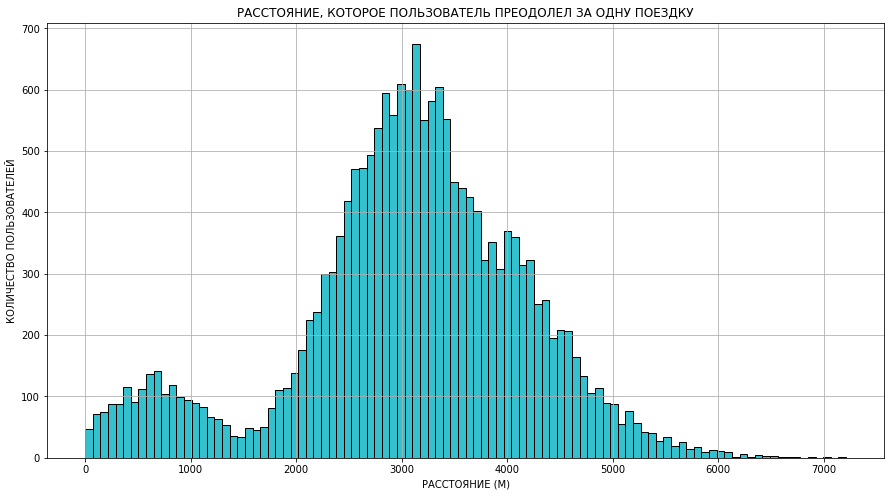

In [30]:
trip['distance'].plot(
    kind='hist', 
    title='РАССТОЯНИЕ, КОТОРОЕ ПОЛЬЗОВАТЕЛЬ ПРЕОДОЛЕЛ ЗА ОДНУ ПОЕЗДКУ', 
    bins=100, 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd',
    edgecolor='black');
plt.ylabel('КОЛИЧЕСТВО ПОЛЬЗОВАТЕЛЕЙ')
plt.xlabel('РАССТОЯНИЕ (М)');

In [31]:
trip['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

График стремится к нормальному, но распределение имеет два пика. Первый пик приходится на значение равное примерно 700 м. далее идёт второй пик и, максимальное расстояние, которое преодолевали пользователи - 7211 м. Минимальное расстояние, которое преодолевали пользователи - 0.8 м. Большая часть пользователей преодолевает расстояние около 2543 - 3776 м.

### Продолжительность поездок

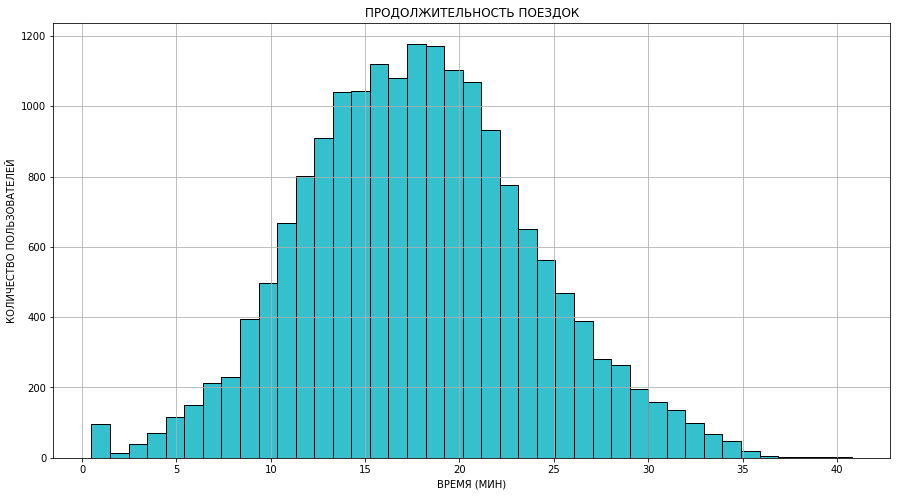

In [32]:
trip['duration'].plot(
    kind='hist', 
    title='ПРОДОЛЖИТЕЛЬНОСТЬ ПОЕЗДОК', 
    bins=41, 
    grid=True, 
    figsize = (15,8),
    color = '#35c0cd',
    edgecolor='black');
plt.ylabel('КОЛИЧЕСТВО ПОЛЬЗОВАТЕЛЕЙ')
plt.xlabel('ВРЕМЯ (МИН)');

In [33]:
trip['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Распределение близко к нормальному. Минимальное затраченное время на поездку - 0.5 мин. Максимальное - 41 мин. Чаще всего на поездку тратят от 14 до 22 мин.

### Зависимость продолжительности поездки от расстояния

Хочется также посмотреть зависимость продолжительности поездки от расстояния: нет ли выбросов или аномальных значений.

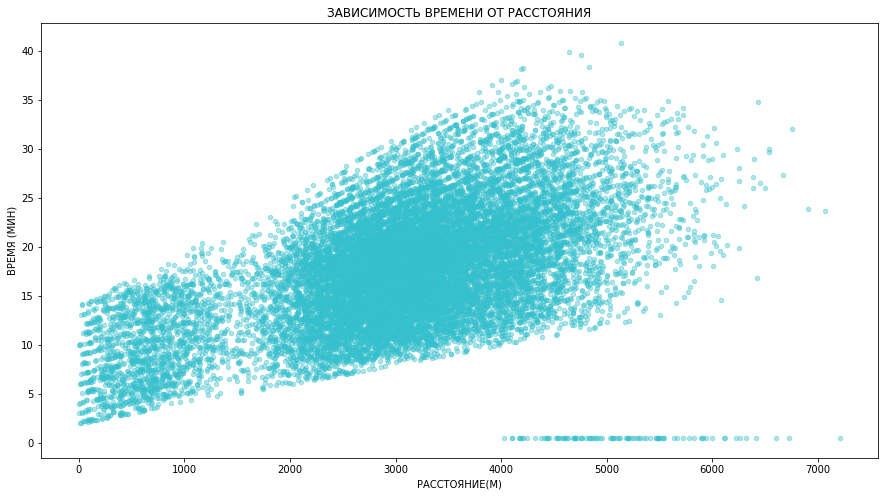

In [34]:
trip.plot(
    x = 'distance',
    y = 'duration',
    kind='scatter',
    title='ЗАВИСИМОСТЬ ВРЕМЕНИ ОТ РАССТОЯНИЯ',  
    alpha = 0.4, 
    figsize = (15,8),
    color = '#35c0cd',);
plt.ylabel('ВРЕМЯ (МИН)')
plt.xlabel('РАССТОЯНИЕ(М)');

Среди пользователей есть странные необъяснимые случаи, когда люди за 0.5 мин преодолевали расстояния от 4 тыс. метров до 7 тыс. метров и более. Возможно, это какой-то сбой. Посмотрим, как много таких записей.

In [35]:
len(trip[(trip['distance'] > 4000) & (trip['duration'] < 3)])

95

95 записей. Удалим их.

In [36]:
trip = trip[trip.duration > 3]

In [37]:
len(trip[(trip['distance'] > 4000) & (trip['duration'] < 3)])

0

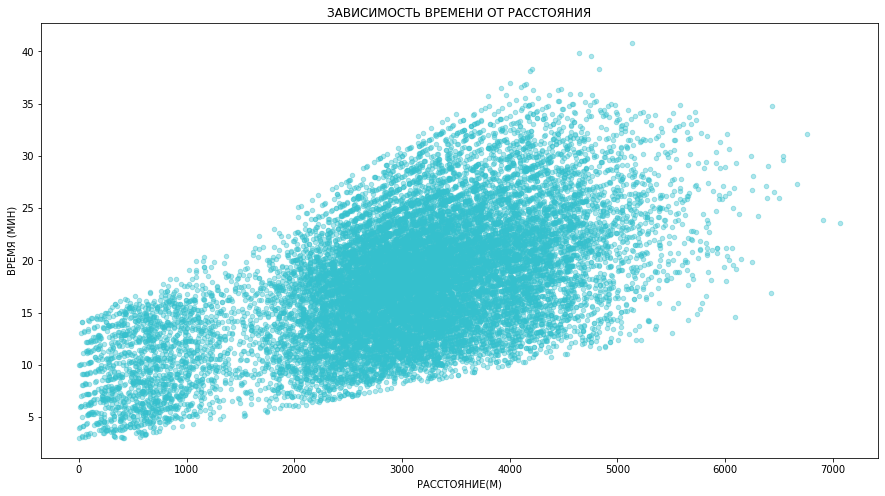

In [38]:
trip.plot(
    x = 'distance',
    y = 'duration',
    kind='scatter',
    title='ЗАВИСИМОСТЬ ВРЕМЕНИ ОТ РАССТОЯНИЯ',  
    alpha = 0.4, 
    figsize = (15,8),
    color = '#35c0cd',);
plt.ylabel('ВРЕМЯ (МИН)')
plt.xlabel('РАССТОЯНИЕ(М)');

### Вывод

Мы провели исследовательский анализ данных и выяснили:
* Данные собраны из восьми городов. Чаще всего встречается Пятигорск, реже всего - Москва;
* 54 % пользователей используют самокаты без подписки, 46 % пользователей подписаны на тариф Ultra. 
* Чаще всего самокатами пользуются люди возрастом от 22 до 28 лет. Реже всего дети от 12 до 17 лет и взрослые от 36 до 43 лет.
* Минимальное расстояние, которое преодолевали пользователи - 0.8 м, максимальное расстояние - 7211 м. Большая часть пользователей преодолевает расстояние от 2543 до 3776 м.
* Минимальное затраченное время на поездку - 0.5 мин. Максимальное - 41 мин. Чаще всего на поездку тратят от 14 до 22 мин.

Также был построен график зависимости продолжительности поездки от расстояния. на графике были обнаружены аномальные значения: люди за 0.5 мин преодолевали расстояния от 4 тыс. метров до 7 тыс. метров и более. Возможно, произошёл какой-то сбой. 95 строк с аномальными значениями удалены.

## Объединение данных

### Объединение данных

Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуемся методом merge().

In [39]:
data = users.merge(trip)
data = data.merge(subscript)
data.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


### Явные дубликаты

Теперь, когда данные объединены, проверим их на **явные дубликаты**.

In [40]:
data.duplicated(subset=[
    'user_id','name', 'age', 'subscription_type',
    'city', 'distance', 'duration', 
    'date']).sum()

319

319 строк. Удалим их.

In [41]:
data = data.drop_duplicates(subset=[
    'user_id','name', 'age', 'subscription_type',
    'city', 'distance', 'duration', 
    'date'])

In [42]:
data.duplicated(subset=[
    'user_id','name', 'age', 'subscription_type',
    'city', 'distance', 'duration', 
    'date']).sum()

0

### Создание датафреймов

Создадим ещё два датафрейма из датафрейма, созданного ранее.

* **c данными о пользователях без подписки:**

In [43]:
data_free = data[data['subscription_type'] == 'free']
data_free['subscription_type'].sort_values().unique()

array(['free'], dtype=object)

In [44]:
data_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6672,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6673,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6674,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6675,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6676,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


* **с данными о пользователях с подпиской:**

In [45]:
data_ultra = data[data['subscription_type'] == 'ultra']
data_ultra['subscription_type'].sort_values().unique()

array(['ultra'], dtype=object)

In [46]:
data_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


### Расстояние и время поездок для пользователей обеих категорий

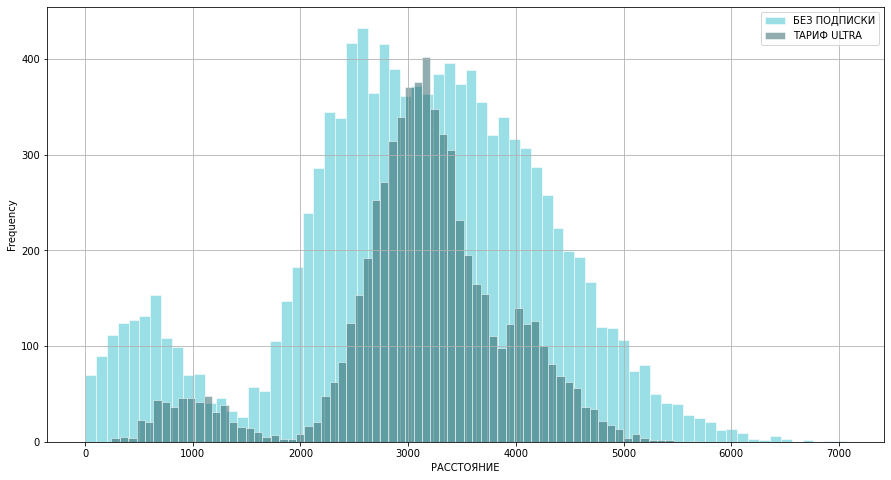

In [47]:
column = ['distance']
for name in column:
    plt.ylabel('КОЛИЧЕСТВО ПОЛЬЗОВАТЕЛЕЙ')
    plt.xlabel('РАССТОЯНИЕ')
    Bin = 70

    A='БЕЗ ПОДПИСКИ'
    B='ТАРИФ ULTRA'
    one_hist(data_free, name, 'РАССТОЯНИЕ, КОТОРОЕ ПОЛЬЗОВАТЕЛЬ С ТАРИФОМ ULTRA ПРЕОДОЛЕЛ ЗА ОДНУ ПОЕЗДКУ')
    second_hist(data_ultra, name, 'РАССТОЯНИЕ, КОТОРОЕ ПОЛЬЗОВАТЕЛЬ С ТАРИФОМ ULTRA ПРЕОДОЛЕЛ ЗА ОДНУ ПОЕЗДКУ')
    plt.show()

In [48]:
data_free['distance'].describe()

count    11440.000000
mean      3036.505908
std       1227.974968
min          0.855683
25%       2366.599066
50%       3105.437378
75%       3887.172414
max       7066.003772
Name: distance, dtype: float64

In [49]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Оба распределения стремятся к нормальному, но имею два пика. 

Первый, маленький пик, на графике "без подписки" находится в районе 600 м. Далее идёт падение в районе 1400 м. Чаще всего пользователи без подписки пользуются самокатами для преодоления расстояний от 2367 м до 3887 м Медиана на графике с пользователями без подписки - 3105 м. Минимальное значение - 0.9 м, максимальное значение - 7066 м.

Первый, маленький пик, на графике с подпиской на тариф Ultra находится в районе 900-1000 м. Далее идёт падение в районе 1700-1800 м. Чаще всего пользователи с подпиской пользуются самокатами для преодоления расстояний от 2785 м до 3560 м. Медиана на графике с пользователями без подписки - 3149м. Минимальное значение - 244 м, максимальное значение - 5700 м.

В целом, можно сказать, что графики дублируют поведение друг друга. Однако гистограмма, построенная для пользователей без подписки имеет большую плотность распределения. Люди, не подписанные на тариф, используют самокаты для самых разных расстояний от 1 м, до 7066 м, тогда как люди, подписанные на тариф ultra не берут самокаты для столь коротких и столь длительных поездок. 

Возможно, пользователи с подпиской используют самокат на постоянной основе, уже обременены абонентской платой и, поэтому не хотят доплачивать сверху этой платы ещё сумму, если нет такой необходимости. А те, кто не подписан, самокатом постоянно не пользуются, абонентской платой не обременены и, могут решить взять самокат спонтанно, даже на короткую дистанцию, т.к. это обойдётся в маленькую сумму. Дополним также, что именно те, кто не подписан, могут брать самокат "на пробу" на маленькие расстояния, чтобы решить для себя, насколько это комфортно.

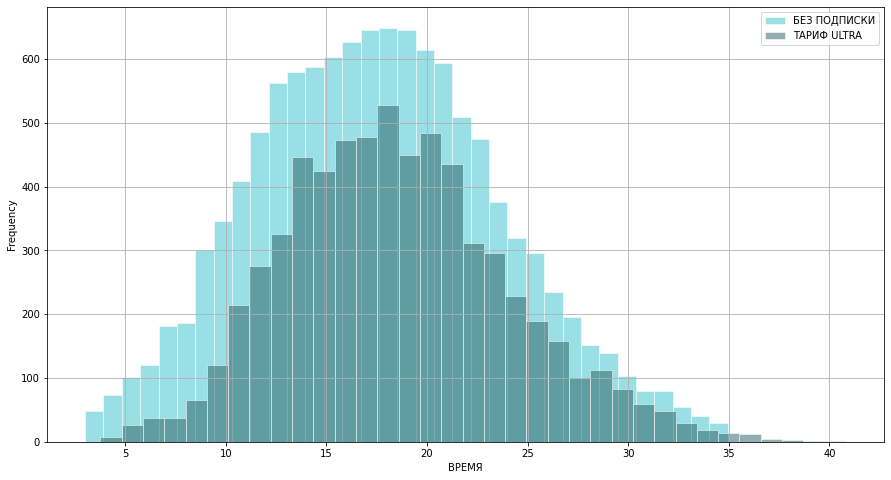

In [50]:
column = ['duration']
for name in column:
    plt.ylabel('КОЛИЧЕСТВО ПОЛЬЗОВАТЕЛЕЙ')
    plt.xlabel('ВРЕМЯ')
    Bin = 35
    A='БЕЗ ПОДПИСКИ'
    B='ТАРИФ ULTRA'
    one_hist(data_free, name, 'РАССТОЯНИЕ, КОТОРОЕ ПОЛЬЗОВАТЕЛЬ С ТАРИФОМ ULTRA ПРЕОДОЛЕЛ ЗА ОДНУ ПОЕЗДКУ')
    second_hist(data_ultra, name, 'РАССТОЯНИЕ, КОТОРОЕ ПОЛЬЗОВАТЕЛЬ С ТАРИФОМ ULTRA ПРЕОДОЛЕЛ ЗА ОДНУ ПОЕЗДКУ')
    plt.show()

In [51]:
data_free['duration'].describe()

count    11440.000000
mean        17.573972
std          6.118671
min          3.006979
25%         13.127990
50%         17.405969
75%         21.651567
max         34.948498
Name: duration, dtype: float64

In [52]:
data_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

Пользователи без подписки пользуются самокатом от 3 мин до 35 мин. В основном поездка занимает от 13 до 22 мин. Среднее значение - 17 мин.

Пользователи с тарифом Ultra пользуются самокатом от 4 мин до 41 мин. В основном поездка занимает от 15 до 22 мин. среднее значение - 18 мин.

Пользователи с тарифом Ultra тратят чуть больше времени на поездки и чаще пользуются самокатами для более дальних расстояний.

### Вывод

На данном этапе данные были объединены в одну таблицу и разделены на два датафрейма по принципу: пользователи с подпиской и пользователи без подписки. 
Далее, для каждой категории были построены графики расстояния и времени поездок. 

Гистограмма расстояния, построенная для пользователей без подписки, имеет большую плотность распределения. Люди, не подписанные на тариф, используют самокаты для самых разных расстояний от 1 м до 7066 м, тогда как люди, подписанные на тариф Ultra не берут самокаты для столь коротких и столь длительных поездок. 

Пользователи с тарифом Ultra тратят чуть больше времени на поездки и чаще пользуются самокатами для более дальних расстояний. На сколько такая разница статистически значима покажет проверка гипотезы. 


## Подсчёт выручки

### Cуммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

Находим количество поездок для каждого пользователя за каждый месяц и записываем в датафрейм df_trip_count.

In [53]:
df_trip_count = data.groupby(['user_id', 'month', 'subscription_type','minute_price','start_ride_price','subscription_fee'])\
                        .agg({'distance':'count'})\
                        .reset_index().rename(columns={'distance':'trip_count'})
df_trip_count.head(15)

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,trip_count
0,1,1,ultra,6,0,199,2
1,1,4,ultra,6,0,199,1
2,1,8,ultra,6,0,199,2
3,1,10,ultra,6,0,199,2
4,1,11,ultra,6,0,199,3
5,1,12,ultra,6,0,199,2
6,2,3,ultra,6,0,199,3
7,2,4,ultra,6,0,199,2
8,2,6,ultra,6,0,199,1
9,2,7,ultra,6,0,199,2


Находим суммарное расстояние для каждого пользователя за каждый месяц и записываем в датафрейм df_distance_sum.

In [54]:
df_distance_sum = data.groupby(['user_id', 'month', 'subscription_type'])\
                        .agg({'distance':'sum'})\
                        .reset_index()\
                        .rename(columns={'distance':'distance_sum (m)'})
df_distance_sum.head(15)

,user_id,month,subscription_type,distance_sum (m)
0,1,1,ultra,7027.511294
1,1,4,ultra,754.159807
2,1,8,ultra,6723.470560
3,1,10,ultra,5809.911100
4,1,11,ultra,7003.499363
5,1,12,ultra,6751.629942
6,2,3,ultra,10187.723006
7,2,4,ultra,6164.381824
8,2,6,ultra,3255.338202
9,2,7,ultra,6780.722964


Находим суммарное время для каждого пользователя за каждый месяц и записываем в датафрейм df_duration_sum.

In [55]:
df_duration_sum = data.groupby(['user_id', 'month', 'subscription_type'])\
                        .agg({'duration':'sum'})\
                        .reset_index()\
                        .rename(columns={'duration':'duration_sum (min)'})
df_duration_sum.head(15)

,user_id,month,subscription_type,duration_sum (min)
0,1,1,ultra,41.416640
1,1,4,ultra,6.232113
2,1,8,ultra,44.776802
3,1,10,ultra,31.578017
4,1,11,ultra,53.397424
5,1,12,ultra,27.203912
6,2,3,ultra,60.959959
7,2,4,ultra,39.048633
8,2,6,ultra,13.851127
9,2,7,ultra,46.170157


Объединим данные из трёх таблиц: df_trip_count, df_distance_sum, df_duration_sum.

In [56]:
df_total = (df_trip_count
            .merge(df_distance_sum, on=['user_id','month', 'subscription_type'], how='outer')
            .merge(df_duration_sum, on=['user_id','month', 'subscription_type'], how='outer')
           )
df_total.head(15)

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,trip_count,distance_sum (m),duration_sum (min)
0,1,1,ultra,6,0,199,2,7027.511294,41.416640
1,1,4,ultra,6,0,199,1,754.159807,6.232113
2,1,8,ultra,6,0,199,2,6723.470560,44.776802
3,1,10,ultra,6,0,199,2,5809.911100,31.578017
4,1,11,ultra,6,0,199,3,7003.499363,53.397424
5,1,12,ultra,6,0,199,2,6751.629942,27.203912
6,2,3,ultra,6,0,199,3,10187.723006,60.959959
7,2,4,ultra,6,0,199,2,6164.381824,39.048633
8,2,6,ultra,6,0,199,1,3255.338202,13.851127
9,2,7,ultra,6,0,199,2,6780.722964,46.170157


### Подсчет помесячной выручки

Добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Минуты при подсчёте стоимости округляются до ближайшего целого числа.

Округлим минуты до ближайшего целого числа.

In [57]:
df_total['duration_sum (min)'] = df_total['duration_sum (min)'].apply(np.ceil)

In [58]:
df_total.head()

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,trip_count,distance_sum (m),duration_sum (min)
0,1,1,ultra,6,0,199,2,7027.511294,42.0
1,1,4,ultra,6,0,199,1,754.159807,7.0
2,1,8,ultra,6,0,199,2,6723.470560,45.0
3,1,10,ultra,6,0,199,2,5809.911100,32.0
4,1,11,ultra,6,0,199,3,7003.499363,54.0


In [59]:
df_total['revenue'] = \
(df_total['start_ride_price'] * df_total['trip_count']) \
+ (df_total['minute_price']*df_total['duration_sum (min)']) \
+ df_total['subscription_fee']
df_total.head(10)

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,trip_count,distance_sum (m),duration_sum (min),revenue
0,1,1,ultra,6,0,199,2,7027.511294,42.0,451.0
1,1,4,ultra,6,0,199,1,754.159807,7.0,241.0
2,1,8,ultra,6,0,199,2,6723.470560,45.0,469.0
3,1,10,ultra,6,0,199,2,5809.911100,32.0,391.0
4,1,11,ultra,6,0,199,3,7003.499363,54.0,523.0
5,1,12,ultra,6,0,199,2,6751.629942,28.0,367.0
6,2,3,ultra,6,0,199,3,10187.723006,61.0,565.0
7,2,4,ultra,6,0,199,2,6164.381824,40.0,439.0
8,2,6,ultra,6,0,199,1,3255.338202,14.0,283.0
9,2,7,ultra,6,0,199,2,6780.722964,47.0,481.0


Для удобства сразу разделим датафрейм на два: с пользователями без подписки с пользователями с подпиской.

In [60]:
free = df_total.query('subscription_type == "free" ').copy()
free

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,trip_count,distance_sum (m),duration_sum (min),revenue
4533,700,1,free,8,50,0,1,2515.690719,15.0,170.0
4534,700,2,free,8,50,0,5,13446.659764,86.0,938.0
4535,700,3,free,8,50,0,1,3798.334905,19.0,202.0
4536,700,4,free,8,50,0,1,2984.551206,16.0,178.0
4537,700,6,free,8,50,0,2,5927.650988,29.0,332.0
...,...,...,...,...,...,...,...,...,...,...
11286,1534,6,free,8,50,0,2,3409.468534,25.0,300.0
11287,1534,8,free,8,50,0,2,7622.453034,48.0,484.0
11288,1534,9,free,8,50,0,1,4928.173852,23.0,234.0
11289,1534,11,free,8,50,0,4,13350.015305,77.0,816.0


In [61]:
ultra = df_total.query('subscription_type == "ultra" ').copy()
ultra['revenue'] = 6 * ultra['duration_sum (min)'] + 199
ultra

,user_id,month,subscription_type,minute_price,start_ride_price,subscription_fee,trip_count,distance_sum (m),duration_sum (min),revenue
0,1,1,ultra,6,0,199,2,7027.511294,42.0,451.0
1,1,4,ultra,6,0,199,1,754.159807,7.0,241.0
2,1,8,ultra,6,0,199,2,6723.470560,45.0,469.0
3,1,10,ultra,6,0,199,2,5809.911100,32.0,391.0
4,1,11,ultra,6,0,199,3,7003.499363,54.0,523.0
...,...,...,...,...,...,...,...,...,...,...
4528,699,6,ultra,6,0,199,1,4072.797406,17.0,301.0
4529,699,8,ultra,6,0,199,2,7018.324143,45.0,469.0
4530,699,9,ultra,6,0,199,2,6364.861911,31.0,385.0
4531,699,10,ultra,6,0,199,1,4707.845501,16.0,295.0


### Выручка за всё время

In [62]:
df_total.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]).T

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
user_id,11291.0,810.048623,440.566746,1.000000,88.000000,433.000000,841.00000,1190.500000,1467.00000,1522.000000,1534.000000
month,11291.0,6.480825,3.441792,1.000000,1.000000,4.000000,6.00000,9.000000,12.00000,12.000000,12.000000
minute_price,11291.0,7.197060,0.980435,6.000000,6.000000,6.000000,8.00000,8.000000,8.00000,8.000000,8.000000
start_ride_price,11291.0,29.926490,24.510873,0.000000,0.000000,0.000000,50.00000,50.000000,50.00000,50.000000,50.000000
subscription_fee,11291.0,79.892569,97.553275,0.000000,0.000000,0.000000,0.00000,199.000000,199.00000,199.000000,199.000000
trip_count,11291.0,1.588876,0.826679,1.000000,1.000000,1.000000,1.00000,2.000000,3.00000,4.000000,7.000000
distance_sum (m),11291.0,4870.075513,2881.594073,2.570787,1226.692405,2965.709148,3972.86577,6394.194823,10554.11362,14419.434906,23429.487786
duration_sum (min),11291.0,28.977504,16.328477,4.000000,11.000000,17.000000,24.00000,37.000000,61.00000,82.000000,141.000000
revenue,11291.0,340.628554,150.429670,82.000000,146.000000,234.000000,319.00000,412.000000,622.00000,832.000000,1428.000000


Выясним, какая выручка получена за всё время с пользователей без подписки и с пользователей с подпиской.

In [63]:
ultra_new  = ultra.pivot_table(index=['month'],
                                    values=['revenue'],
                                    aggfunc=['sum'])
ultra_new.columns = ['revenue_sum']
ultra_new.head(15)

,revenue_sum
month,
1,143502.0
2,124266.0
3,142074.0
4,136826.0
5,148647.0
6,143342.0
7,142896.0
8,138096.0
9,128863.0


In [64]:
ultra_new['revenue_sum'].sum()

1638597.0

In [65]:
free_new  = free.pivot_table(index=['month'],
                                    values=['revenue'],
                                    aggfunc=['sum'])
free_new.columns = ['revenue_sum']
free_new.head(15)

,revenue_sum
month,
1,191716.0
2,163620.0
3,184958.0
4,183198.0
5,185738.0
6,190074.0
7,182880.0
8,184832.0
9,191414.0


In [66]:
free_new['revenue_sum'].sum()

2207440.0

### Вывод

На данном этапе был создан датафрейм с агрегированными данными о поездках. Были найдены: суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Все данные добавлены в датафрейм. Датафрейм поделён на два: с данными о пользователях без подписки и с данными о пользователях с подпиской. И для тех и для других подсчитана полученная помесячная выручка для каждого пользователя.

Также выяснили, какую выручку получил прокатчик за всё время:
* Выручка от пользователей с подпиской на тариф: 1638597.0
* Выручка от пользователей без подписки на тариф: 2207440.0

В среднем пользователи проезжают 4870 м.
Среднее время использования самоката: 28 мин.
Средняя выручка компании за месяц от одного пользователя составляет 340 р.

## Проверка гипотез

### Гипотеза 1

**Задание**: Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то действительно ли пользователи с подпиской «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

* **Нулевая гипотеза**: пользователи с подпиской тратят на поездки столько же времени, сколько пользователи без подписки.
* **Альтернативная гипотеза**: пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки.

Нужно сравнить две генеральные совокупности между собой. 
Будем применять t-тест. Это возможно, т.к. генеральные совокупности не зависят друг от друга. Выборки по размеру практически одинаковые, но есть сомнения, что дисперсии у совокупностей одинаковые, поэтому укажем параметр equal_var как False.
Проверять будем одностороннюю гипотезу, т.к. альтернативная гипотеза правостороняя и, звучит как "наблюдаемое значение больше предполагаемого".

Проверим, на сколько такая разница статистически значима. для этого возьмём исходные датафреймы.

In [67]:
alpha = 0.05

results = st.ttest_ind( data_ultra['duration'], data_free['duration'], equal_var=False, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось опровергнуть нулевую гипотезу') 

p-значение: 2.4377910121049114e-27
Отвергаем нулевую гипотезу


Пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки. Как было сказано выше, люди подписываются на тариф, когда им нужно пользоваться самокатами на постоянной основе. Т.к. они понимают, что без подписки это может обойтись им дороже. 

### Гипотеза 2

**Задание:** Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

* **Нулевая гипотеза**: расстояние, которое проезжают пользователи с подпиской равно 3130 метров.
* **Альтернативная гипотеза**: расстояние, которое проезжают пользователи с подпиской за одну поездку, более 3130 метров.

Нужно сравнить среднее расстояние одной поездки пользователей с подпиской на тариф Ultra с числом 3130 м. Т.е. работать будем с одной генеральной совокупностью.

Будем применять t-тест. Это возможно, т.к. генеральные совокупности не зависят друг от друга. 

Проверять будем одностороннюю гипотезу, т.к. альтернативная гипотеза правостороняя и, звучит как "наблюдаемое значение больше предполагаемого".

Как  было видно из графика ранее:
* Среднее расстояние, на которое используют самокат пользователи без подписки: 3045 м
* Среднее расстояние, на которое используют самокат пользователи с подпиской: 3115 м

In [68]:
len(data_ultra[data_ultra['distance'] < 3130])

3150

In [70]:
len(data_ultra[data_ultra['distance'] > 4000])

875

Из всех пользователей, кто подписан на тариф Ultra, чуть более половины проезжают расстояния больше 3130 м., что может изнашивать транспорт сильнее, чем рассчитывает прокатчик. Однако, теоретически, большая часть пользователей проезжает не сильно больше 3130 м.

Проверим, насколько разница статистически значима.

In [71]:
alpha = 0.05

interested_value = 3130 

results = st.ttest_1samp( data_ultra['distance'], interested_value, alternative='greater')
    
print('p-значение:', results.pvalue) # добавьте в аргумент p-value

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось опровергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось опровергнуть нулевую гипотезу


Не можем опровергнуть нулевую гипотезу. Таким образом, разница не считается статистически значимой.

### Гипотеза 3

**Задание:** Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

* **Нулевая гипотеза**: помесячная выручка от пользователей с подпиской такая же, как от пользователей без подписки.
* **Альтернативная гипотеза**: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Нужно сравнить две генеральные совокупности между собой. 

Будем применять t-тест. Это возможно, т.к. генеральные совокупности не зависят друг от друга. Выборки по размеру практически одинаковые, но есть сомнения, что дисперсии у совокупностей одинаковые, поэтому укажем параметр equal_var как False.
Проверять будем одностороннюю гипотезу, т.к. альтернативная гипотеза правостороняя и, звучит как "наблюдаемое значение больше предполагаемого".

Как подсчитывали ранее:
* Выручка от пользователей с подпиской на тариф: 1638597.0 
* Выручка от пользователей без подписки на тариф: 2215080.0

In [72]:
alpha = 0.05

results = st.ttest_ind( ultra['revenue'], free['revenue'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось опровергнуть нулевую гипотезу') 

p-значение: 5.133631551272124e-34
Отвергаем нулевую гипотезу


Таким образом, действительно, помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

### Гипотеза 4

**Задание:** Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

 В этом случае нужно проверить, равны ли средние совокупности до и после обновления сервера. 

* **Нулевая гипотеза**: количество обращений в техподдержку после обновления сервера не изменилось.
* **Альтернативная гипотеза**: количество обращений в техподдержку после обновления сервера снизилось.

Чтобы проверить гипотезу нужно применить **метод scipy.stats.ttest_rel()**. Ему передаются данные с двух датасетов: до изменений и после.

### Вывод

На данном этапе проверили 3 гипотезы и выяснили:
* Пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки. Это логично, т.к., как было сказано выше, люди подписываются на тариф, когда им нужно пользоваться самокатами на постоянной основе. Т.к. они понимают, что без подписки это может обойтись им дороже. Как уже говорилось, чтобы подписка была выгодной, достаточно иметь необходимость проезжать более более 75 мин за месяц.
* Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. Среднее расстояние, на которое используют самокат пользователи с подпиской: 3115 м. Бывает и больше, но проверка показала, что это не значимо.
* Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Прокатчику выгодно, чтобы пользователи подписывались на тариф.

Продакт-менеджеры верно хотят увеличить количество пользователей с подпиской и, компания может сосредоточиться на этой цели.

## Распределения

1. Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соотвествующий платёж. 
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Подберём параметры распределения, описывающего ситуацию. По условию задачи получается, что в прошлый раз раздали 1000 промокодов, после чего 100 клиентов (10%) продлили подписку. Визуализируем это.

/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


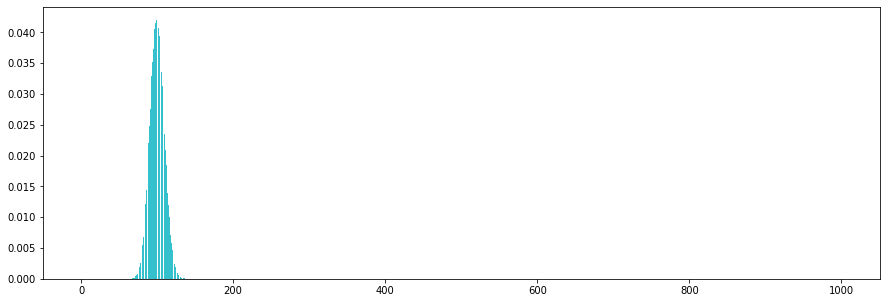

In [73]:
n =1000 # количество попыток
p = 0.1 # вероятность успеха

distr = []

for k in range(0, n + 1):
    current_value = st.binom.pmf(k, n, p)
    distr.append(current_value)
plt.figure(figsize=(15,5))    
plt.bar(range(0, n + 1), distr, color=('#35c0cd'));

По графику видно, что если раздать 1000 промокодов, то получить около 100 новых подписок - наиболее вероятный результат. Однако видно, что в промежутке от 0 до 100 расположена примерно половина графика. Значит, вероятность получить менее 100 подписок велика, поэтому лучше раздать более 1000 промокодов.

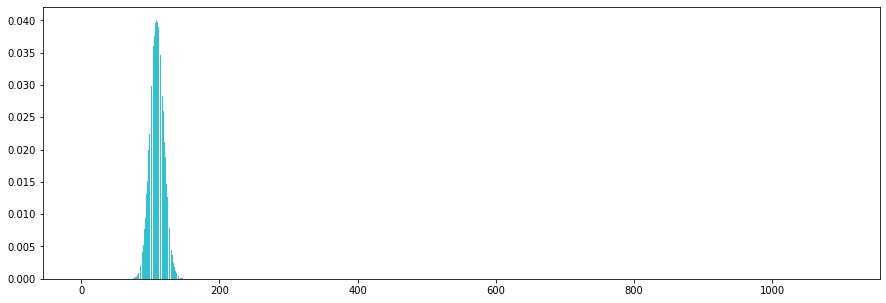

In [74]:
n =1100 # количество попыток
p = 0.1 # вероятность успеха

distr = []

for k in range(0, n + 1):
    current_value = st.binom.pmf(k, n, p)
    distr.append(current_value)
plt.figure(figsize=(15,5))    
plt.bar(range(0, n + 1), distr, color=('#35c0cd'));

Если раздать на 100 промокодов больше, то вероятность получить менее 100 подписок уменьшается. Аппроксимируем биномиальное распределение нормальным. Подберём количество предлагаемых промокодов так, чтобы вероятность не выполнить план была примерно 5%.

In [75]:
# задаём параметры биномиального распределения
n = 1168
p = 0.1

# задаём параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 100 шт
result = distr.cdf(100)
print(result)

0.050650790692463


Проверим на сколько вероятность, рассчитанная с помощью нормальной аппроксимации может отклоняться от истинной.

In [76]:
# задаём параметры биномиального распределения
n = 1168
p = 0.1

# задаём параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение 
distr = st.norm(mu, sigma) 

# найдём суммарную ошибку аппроксимации:
error_values = []
for i in range(n + 1):
    error = abs(st.binom.pmf(i, n, p) - (distr.cdf(i + 0.5) - distr.cdf(i - 0.5)))
    error_values.append(error)
 
print('Средняя разница вероятностей на значение:', sum(error_values) / len(error_values))
print('Максимальная разница вероятностей:', max(error_values))

Средняя разница вероятностей на значение: 1.6821004108319987e-05
Максимальная разница вероятностей: 0.0007173384275500141


В среднем для X∼B(1168, 0.1) вероятность, рассчитанная с помощью нормальной аппроксимации, отклоняется от истинной на 0,00168%.
Максимальная разница — 0,071%. 


2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 
40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 
399,5 тыс. пользователей.

Визуализируем ситуацию.

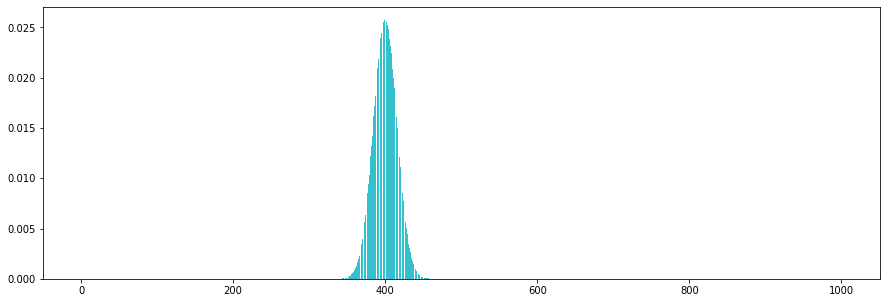

In [77]:
n =1000 # количество попыток делённое на 1000, чтобы можно было визуализировать ситуацию и не "зависнуть")
p = 0.4 # вероятность успеха

distr = []

for k in range(0, n + 1):
    current_value = st.binom.pmf(k, n, p)
    distr.append(current_value)
plt.figure(figsize=(15,5))    
plt.bar(range(0, n + 1), distr, color=('#35c0cd'));

Воспользуемся нормальной аппроксимацией биномиального распределения и cdf() для быстрой оценки.

In [78]:
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

# задаём параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399500 шт
result = distr.cdf(399500)
print(result)

0.15371708296369768


Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей около 15 %.

## Общий вывод и рекомендации

Перед анализом провели предобработку данных, добавили в датафрейм новый столбец с номером месяца. Проверили данные на наличие пропущенных значений и дубликатов. Пропущенные значения и неявные дубликаты не выявлены.

Мы провели исследовательский анализ данных и выяснили:

* Данные собраны из восьми городов. Чаще всего встречается Пятигорск, реже всего - Москва;
* 54 % пользователей используют самокаты без подписки, 46 % пользователей подписаны на тариф Ultra.
* Чаще всего самокатами пользуются люди возрастом от 22 до 28 лет. Реже всего дети от 12 до 17 лет и взрослые от 36 до 43 лет.
* Минимальное расстояние, которое преодолевали пользователи - 0.8 м, максимальное расстояние - 7211 м. 
* Большая часть пользователей преодолевает расстояние от 2543 до 3776 м.
* Минимальное затраченное время на поездку - 3 мин. Максимальное - 41 мин. 
* Чаще всего на поездку тратят от 14 до 22 мин.

При визуализации данных были обнаружены аномальные значения: люди за 0.5 мин преодолевали расстояния от 4 тыс. метров до 7 тыс. метров и более. 95 строк с аномальными значениями удалены.

Для каждой категории пользователей (с подпиской и без) были построены графики расстояния и времени поездок.
Определили: 
* Люди, не подписанные на тариф, используют самокаты для самых разных расстояний от 1 м до 7066 м, тогда как люди, подписанные на тариф Ultra не берут самокаты для столь коротких и столь длительных поездок.
* Пользователи с тарифом Ultra тратят чуть больше времени на поездки и чаще пользуются самокатами для более дальних расстояний. 

Далее нашли: суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Все данные добавлены в датафрейм. Подсчитала помесячная выручка, полученная от для каждого пользователя.

Также выяснили, какую выручку получил прокатчик за всё время:
* Выручка от пользователей с подпиской на тариф: 1638597.0
* Выручка от пользователей без подписки на тариф: 2207440.0

В среднем пользователи проезжают 4870 м.
Среднее время использования самоката: 28 мин.
Средняя выручка компании за месяц от одного пользователя составляет 340 р.

Прокатчик хочет увеличить процент пользователей, которые будут подписаны на тариф Ultra. 
Проверка гипотез показала:

* Пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки. 
* Расстояние, которое проезжают пользователи с подпиской за одну поездку, в основном не превышает 3130 метров. 
* Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Таким образом, продакт-менеджеры верно хотят увеличить количество пользователей с подпиской и, компания может сосредоточиться на этой цели. Для этого можно:

* Увеличить стоимость одной минуты, либо стоимость старта для пользователей без подписки, если позволяет конкуренция.
* Если первое невозможно - уменьшить стоимость одной минуты или абонентскую плату так, чтобы пользователю было выгодно взять подписку для меньшего количества минут на месяц (сейчас выгодно брать подписку, если клиент проезжает более 75 мин/мес.)
* Первые два пункта можно совместить, в зависимости от ситуации на рынке и возможностей компании.
* Провести акцию, предоставив за первый месяц ощутимо более выгодные условия. Таким образом можно "подтолкнуть" на подписку тех, кто не может решиться. 

Для реализации идеи провести акцию с раздачей промокодов на один бесплатный месяц подписки и получить как минимум 100 существующих клиентов, которые должны продлить эту подписку рекомендуется раздать не менее 1168 промокодов. По проведённым подсчётам, так, вероятность выполнить план будет примерно 95%.

Отделом маркетинга в ходе работы с проектом было принято решение рассылать клиентам push-уведомления в мобильном приложении. Так, они планируют разослать 1 млн уведомлений. Была поставлена задача оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей при условии, что сотрудникам известно - уведомления открывают около 40 % получивших клиентов. 
Выяснено: вероятность того, что уведомление откроют не более 399,5 тыс. пользователей около 15 %.